Note: you may need to restart the kernel to use updated packages.
Extracting named entities, methods, years, and metrics...

Top research organizations mentioned:
- LLM: 48
- RL: 14
- DeepSeek-R1: 14
- AI: 13
- Large Language Models: 10
- RGB: 10
- RAG: 9
- CoT: 9
- CLIP: 8
- 3D: 8
- RecSys: 8
- MPC: 8
- LoRA: 7
- CAM: 7
- QA: 6

Top AI methods mentioned:
- reinforcement learning: 18
- GPT: 11
- self-supervised: 8
- multi-modal: 6
- diffusion model: 6
- Reinforcement Learning: 5
- diffusion models: 5
- Diffusion models: 3
- GPT-4: 2
- contrastive learning: 2
- VAE: 2
- VAEs: 2
- recurrent neural networks: 1
- T5-large: 1
- GAN: 1

Top evaluation metrics mentioned:
- accuracy: 29
- precision: 4
- F1: 4
- recall: 2
- FID: 2
- Recall: 2
- Precision: 1
- ROUGE-L: 1
- METEOR: 1

Saved enriched paper data with extracted metadata


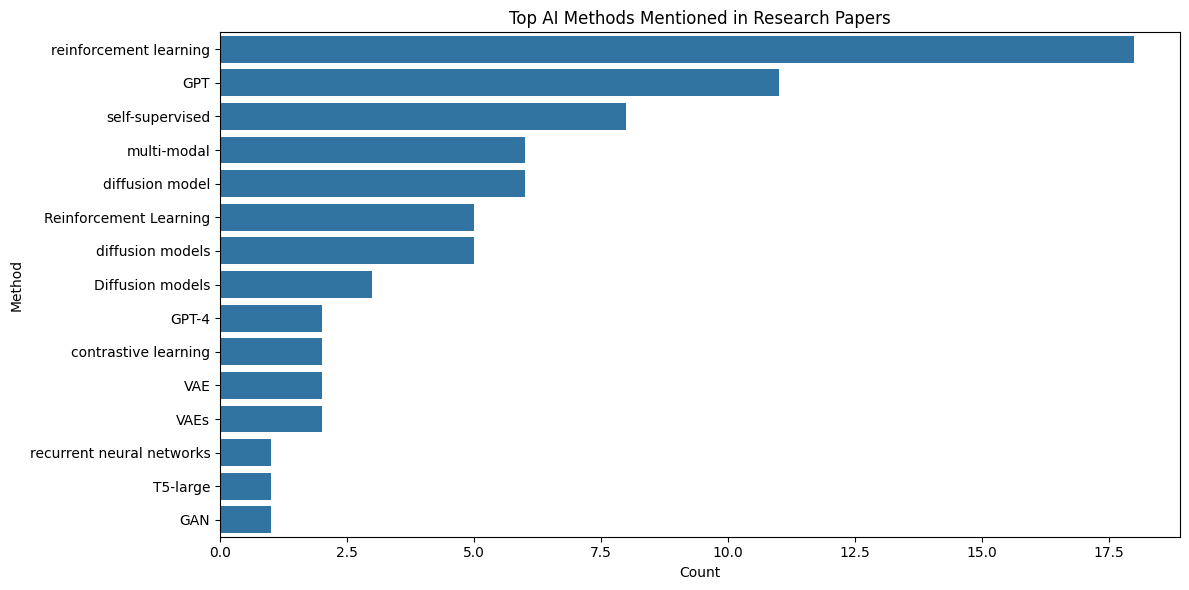

In [2]:
# 02_metadata_extraction.ipynb
%pip install spacy nltk
import pandas as pd
import numpy as np
import spacy
import re , os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Load preprocessed papers
papers_df = pd.read_csv(r'C:\Users\Kanchan\Desktop\SciReX\data\cleaned\generative_ai_papers.csv')

# Function to extract named entities
def extract_entities(text):
    """Extract named entities using spaCy"""
    doc = nlp(text)
    entities = {}

    for ent in doc.ents:
        if ent.label_ not in entities:
            entities[ent.label_] = []
        entities[ent.label_].append(ent.text)

    return entities

# Function to extract methods mentioned in text
def extract_methods(text):
    """
    Extract potential AI methods and techniques from text
    Uses rule-based pattern matching
    """
    # Common AI method patterns
    method_patterns = [
        r'\b(?:Conv(?:olutional)?|Recurrent|Transformer|LSTM|GRU|MLP)\s+Neural\s+Networks?\b',
        r'\bGAN(?:s)?\b',
        r'\bVAE(?:s)?\b',
        r'\bBERT(?:-[A-Za-z]+)?\b',
        r'\bGPT(?:-[0-9]+)?\b',
        r'\bT5(?:-[A-Za-z0-9]+)?\b',
        r'\bResNet(?:-[0-9]+)?\b',
        r'\bVGG(?:-[0-9]+)?\b',
        r'\bEfficientNet(?:-[A-Za-z0-9]+)?\b',
        r'\bU-Net\b',
        r'\bYOLO(?:v[0-9]+)?\b',
        r'\bDiffusion\s+Models?\b',
        r'\bNeural\s+Radiance\s+Fields?\b',
        r'\bNeRF\b',
        r'\bContrastive\s+Learning\b',
        r'\bSelf-(?:Supervised|Attention)\b',
        r'\bReinforcement\s+Learning\b',
        r'\bTransfer\s+Learning\b',
        r'\bMulti(?:-|\s+)Modal(?:ity)?\b'
    ]

    methods = []
    for pattern in method_patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        methods.extend([m.strip() for m in matches if m.strip()])

    return list(set(methods))

# Function to extract years from text
def extract_years(text):
    """Extract years (2000-2025) mentioned in text"""
    years = re.findall(r'\b(20[0-2][0-5])\b', text)
    return list(set(years))

# Function to check for evaluation metrics
def extract_metrics(text):
    """Extract evaluation metrics mentioned in text"""
    metric_patterns = [
        r'\bBLEU\b',
        r'\bROUGE(?:-[LN1-9])?\b',
        r'\bMETEOR\b',
        r'\bPPL\b',
        r'\bPerplexity\b',
        r'\bAccuracy\b',
        r'\bPrecision\b',
        r'\bRecall\b',
        r'\bF1(?:-Score)?\b',
        r'\bMAE\b',
        r'\bMSE\b',
        r'\bRMSE\b',
        r'\bAUC(?:-ROC)?\b',
        r'\bFID\b',
        r'\bInception\s+Score\b',
        r'\bSacre\s*BLEU\b',
        r'\bMAPE\b',
        r'\bBilingual\s+Evaluation\s+Understudy\b'
    ]

    metrics = []
    for pattern in metric_patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        metrics.extend([m.strip() for m in matches if m.strip()])

    return list(set(metrics))

# Apply entity extraction to abstracts
print("Extracting named entities, methods, years, and metrics...")
papers_df['entities'] = papers_df['abstract'].apply(extract_entities)
papers_df['methods'] = papers_df['abstract'].apply(extract_methods)
papers_df['years_mentioned'] = papers_df['abstract'].apply(extract_years)
papers_df['metrics'] = papers_df['abstract'].apply(extract_metrics)

# Extract common organizations (ORG entities)
all_orgs = []
for entities in papers_df['entities']:
    if 'ORG' in entities:
        all_orgs.extend(entities['ORG'])

top_orgs = Counter(all_orgs).most_common(15)
print("\nTop research organizations mentioned:")
for org, count in top_orgs:
    print(f"- {org}: {count}")

# Extract common methods
all_methods = []
for methods in papers_df['methods']:
    all_methods.extend(methods)

top_methods = Counter(all_methods).most_common(15)
print("\nTop AI methods mentioned:")
for method, count in top_methods:
    print(f"- {method}: {count}")

# Extract common metrics
all_metrics = []
for metrics in papers_df['metrics']:
    all_metrics.extend(metrics)

top_metrics = Counter(all_metrics).most_common(10)
print("\nTop evaluation metrics mentioned:")
for metric, count in top_metrics:
    print(f"- {metric}: {count}")

# Create the directory if it doesn't exist
os.makedirs('data/cleaned', exist_ok=True)
# Create the directory if it doesn't exist
os.makedirs('data/visualizations', exist_ok=True)

# Save enriched data
papers_df.to_csv('data/cleaned/generative_ai_papers_enriched.csv', index=False)
print("\nSaved enriched paper data with extracted metadata")

# Visualize top methods
plt.figure(figsize=(12, 6))
method_df = pd.DataFrame(top_methods, columns=['Method', 'Count'])
sns.barplot(x='Count', y='Method', data=method_df)
plt.title('Top AI Methods Mentioned in Research Papers')
plt.tight_layout()
plt.savefig('data/visualizations/top_methods.png')